In [252]:
# 매수/매도 signal 
# 전일 가격 보다 크면 매수 작으면 매도 

import pandas_datareader as pdr 
import datetime 
import pandas as pd
import numpy as np

In [396]:
TICKER = ['SPY', 'QQQ',  'EFA', 'IWM', 'VNQ']
start_date = '20200101'
end_date = datetime.datetime.now()
df = pdr.DataReader(TICKER, 'yahoo', start_date, end_date)['Adj Close']
df.head(10)

Symbols,SPY,QQQ,EFA,IWM,VNQ
Date,,,,,
2019-12-31,313.901062,210.895065,66.895004,162.790283,87.891907
2020-01-02,316.836670,214.416458,67.569351,162.898392,86.859444
2020-01-03,314.437500,212.452408,66.731232,162.259674,87.399361
2020-01-06,315.637115,213.821289,66.991341,162.475876,87.503540
2020-01-07,314.749573,213.791519,66.808304,161.935425,86.527931
2020-01-08,316.427063,215.398438,67.000969,162.436554,86.793144
2020-01-09,318.572632,217.223633,67.155106,162.633057,86.745789
2020-01-10,317.655884,216.668137,66.904633,162.023849,87.408829
2020-01-13,319.840515,219.167801,67.251442,163.075241,88.460236


In [397]:
df_diff = df.diff()
df_diff.head(10)

Symbols,SPY,QQQ,EFA,IWM,VNQ
Date,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-01-02,2.935608,3.521393,0.674347,0.108109,-1.032463
2020-01-03,-2.399170,-1.964050,-0.838120,-0.638718,0.539917
2020-01-06,1.199615,1.368881,0.260109,0.216202,0.104179
2020-01-07,-0.887543,-0.029770,-0.183037,-0.540451,-0.975609
2020-01-08,1.677490,1.606918,0.192665,0.501129,0.265213
2020-01-09,2.145569,1.825195,0.154137,0.196503,-0.047356
2020-01-10,-0.916748,-0.555496,-0.250473,-0.609207,0.663040
2020-01-13,2.184631,2.499664,0.346809,1.051392,1.051407


In [398]:
df_signal = pd.DataFrame(np.where(df_diff >= 0, 1, 0),index = df_diff.index, columns = TICKER)
df_signal.head(10)

,SPY,QQQ,EFA,IWM,VNQ
Date,,,,,
2019-12-31,0,0,0,0,0
2020-01-02,1,1,1,1,0
2020-01-03,0,0,0,0,1
2020-01-06,1,1,1,1,1
2020-01-07,0,0,0,0,0
2020-01-08,1,1,1,1,1
2020-01-09,1,1,1,1,0
2020-01-10,0,0,0,0,1
2020-01-13,1,1,1,1,1


In [399]:
df_total = pd.concat([df,df_signal],axis =1)

In [400]:
df_position = df_signal.diff()
df_position.head(10)

,SPY,QQQ,EFA,IWM,VNQ
Date,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.0,1.0,1.0,1.0,0.0
2020-01-03,-1.0,-1.0,-1.0,-1.0,1.0
2020-01-06,1.0,1.0,1.0,1.0,0.0
2020-01-07,-1.0,-1.0,-1.0,-1.0,-1.0
2020-01-08,1.0,1.0,1.0,1.0,1.0
2020-01-09,0.0,0.0,0.0,0.0,-1.0
2020-01-10,-1.0,-1.0,-1.0,-1.0,1.0
2020-01-13,1.0,1.0,1.0,1.0,0.0


In [402]:
df_signal.head(10)

,SPY,QQQ,EFA,IWM,VNQ
Date,,,,,
2019-12-31,0,0,0,0,0
2020-01-02,1,1,1,1,0
2020-01-03,0,0,0,0,1
2020-01-06,1,1,1,1,1
2020-01-07,0,0,0,0,0
2020-01-08,1,1,1,1,1
2020-01-09,1,1,1,1,0
2020-01-10,0,0,0,0,1
2020-01-13,1,1,1,1,1


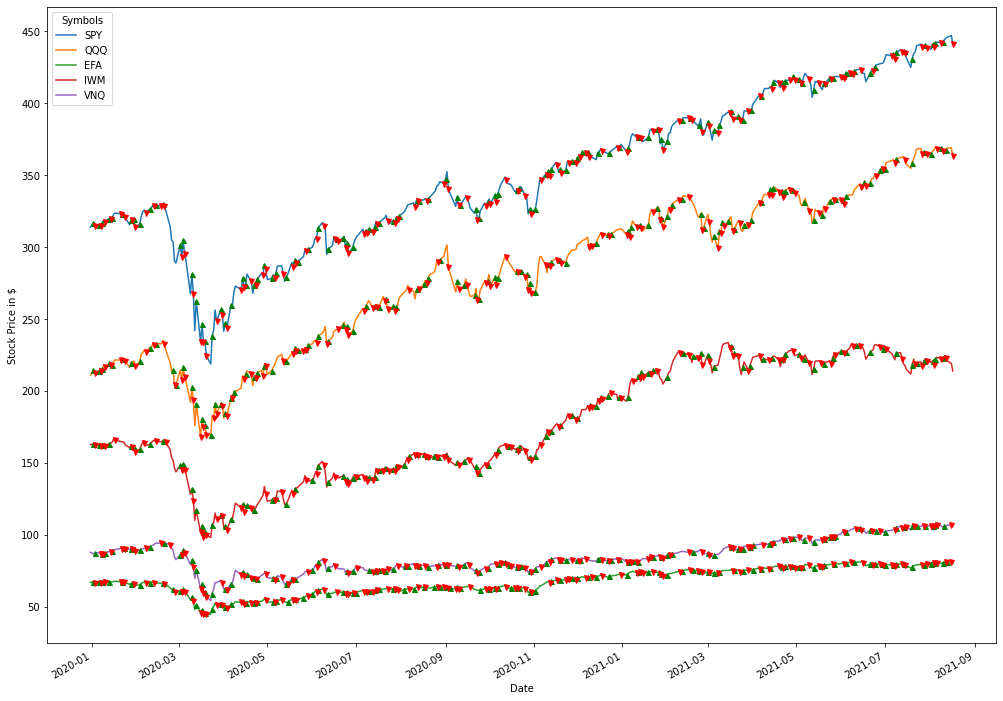

In [403]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(17,13))
ax1 = fig.add_subplot(111, ylabel = 'Stock Price in $')
df.plot(ax= ax1)
ax1.plot(df_signal.index, df[df_position==1], '^', markersize = 5, color = 'g')
ax1.plot(df_signal.index, df[df_position==-1], 'v', markersize = 5, color = 'r')
plt.show()

In [404]:
initial_capital = float(1000.0)
positions = pd.DataFrame(index = df_signal.index).fillna(0)
positions = pd.concat([positions,df_signal],axis =1)
portfolio = pd.DataFrame(index = df_signal.index).fillna(0)
positions.head(10)

,SPY,QQQ,EFA,IWM,VNQ
Date,,,,,
2019-12-31,0,0,0,0,0
2020-01-02,1,1,1,1,0
2020-01-03,0,0,0,0,1
2020-01-06,1,1,1,1,1
2020-01-07,0,0,0,0,0
2020-01-08,1,1,1,1,1
2020-01-09,1,1,1,1,0
2020-01-10,0,0,0,0,1
2020-01-13,1,1,1,1,1


In [405]:
positions = pd.concat([positions,df_signal],axis =1)
portfolio['positions'] = (positions * df).multiply((1/df_signal.sum(1)).replace([np.inf, -np.inf], np.nan).fillna(0), axis = 0).sum(1)
portfolio

,positions
Date,
2019-12-31,0.000000
2020-01-02,380.860435
2020-01-03,174.798721
2020-01-06,338.571664
2020-01-07,0.000000
...,...
2021-08-11,427.209999
2021-08-12,612.546656
2021-08-13,501.460011


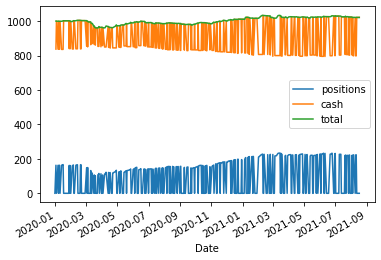

In [409]:
initial_capital= float(1000.0)

tTICKER = 'IWM'

positions = pd.DataFrame(index=df_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=df_signal.index).fillna(0.0)
positions[tTICKER] = df_signal[tTICKER]
portfolio['positions'] = (positions.multiply(df[tTICKER], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(df[tTICKER], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio.plot()
plt.show()

In [410]:
portfolio

,positions,cash,total
Date,,,
2019-12-31,0.000000,NaN,NaN
2020-01-02,162.898392,837.101608,1000.000000
2020-01-03,0.000000,999.361282,999.361282
2020-01-06,162.475876,836.885406,999.361282
2020-01-07,0.000000,998.820831,998.820831
...,...,...,...
2021-08-11,223.690002,797.937881,1021.627884
2021-08-12,0.000000,1021.097885,1021.097885
2021-08-13,0.000000,1021.097885,1021.097885
